In [1]:
# imports
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

In [2]:
df_energy_2019 = pd.read_csv('../../data/prepared/df_energy_2019.csv')

In [3]:
df_energy_2019.head()

,datetime,nuclear_power,not_renewable,renewable,energy_price,date,day_of_week,time,total_energy_feeding
0,2019-01-01 00:00:00,8892.407,25424.272,31947.038,10.07,2019-01-01,Tuesday,00:00:00,66263.717
1,2019-01-01 00:15:00,8681.530,24780.327,32453.560,10.07,2019-01-01,Tuesday,00:15:00,65915.417
2,2019-01-01 00:30:00,8443.552,24263.619,33072.850,10.07,2019-01-01,Tuesday,00:30:00,65780.021
3,2019-01-01 00:45:00,8101.865,23910.911,33369.737,10.07,2019-01-01,Tuesday,00:45:00,65382.513
4,2019-01-01 01:00:00,8041.866,23552.715,33044.778,-4.08,2019-01-01,Tuesday,01:00:00,64639.359


In [4]:
df_energy_2019.describe()

,nuclear_power,not_renewable,renewable,energy_price,total_energy_feeding
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,8104.209656,38488.136252,26920.590264,37.668148,73512.936171
std,1282.795889,10918.125898,11163.314589,15.516580,12606.685487
min,3368.407000,14071.000000,7966.850000,-90.010000,40414.548000
25%,7439.801000,30453.045750,17633.921750,31.060000,63995.359250
50%,8613.097000,37670.700500,25325.340000,38.065000,73840.106000
75%,9226.541500,45806.110500,34856.912750,46.270000,82938.587500
max,9521.149000,69031.545000,64445.469000,121.460000,103926.801000


In [5]:
df_energy_2019.loc[:,['nuclear_power', 'not_renewable', 'renewable', 'energy_price']].corr()

,nuclear_power,not_renewable,renewable,energy_price
nuclear_power,1.000000,0.544494,-0.079859,0.287974
not_renewable,0.544494,1.000000,-0.408209,0.762407
renewable,-0.079859,-0.408209,1.000000,-0.470676
energy_price,0.287974,0.762407,-0.470676,1.000000


- renewable energy has a negative correlation to energy price
- not renewable energy has a strong correlation to energy price

### Analyzation - Day of week and Energy Price

In [6]:
# Name dataframe grouped by weekeday
grp_day_of_week = df_energy_2019.groupby(['day_of_week'])

In [7]:
list_day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Energy price grouped by day_of_week
desc = grp_day_of_week['energy_price'].describe()
# Add a column Q3 - Q1
desc['QD'] = (desc['75%'] - desc['25%']) / 2
# create a series of median and rename column
median = grp_day_of_week['energy_price'].median()
median.rename('median', inplace=True)

# merge extended description and median 
desc_with_med_and_qd = pd.merge(desc, median, on='day_of_week')
desc_with_med_and_qd.reindex(index=list_day_of_week)

,count,mean,std,min,25%,50%,75%,max,QD,median
day_of_week,,,,,,,,,,
Monday,4992.0,38.995649,16.590090,-83.01,32.7850,40.095,48.1575,88.50,7.68625,40.095
Tuesday,5088.0,40.716069,13.874624,-33.57,34.5075,40.830,48.9075,80.23,7.20000,40.830
Wednesday,4992.0,41.704183,13.360494,-48.93,34.5400,41.160,49.6550,93.76,7.55750,41.160
Thursday,4992.0,41.712788,13.252681,0.03,34.1250,39.990,47.9525,121.46,6.91375,39.990
Friday,4992.0,40.712588,11.503398,-19.95,33.9975,40.070,47.7050,97.00,6.85375,40.070
Saturday,4992.0,31.472612,16.837694,-90.01,28.0075,34.305,39.6125,68.91,5.80250,34.305
Sunday,4992.0,28.304535,16.419891,-50.43,23.0950,31.010,37.9500,69.75,7.42750,31.010


- Energy price on weekend are lower than on weekdays
- Mean and median are almost the same -> the prices are more or less evenly distributed from the lowest to highest price

<AxesSubplot: xlabel='day_of_week', ylabel='energy_price'>

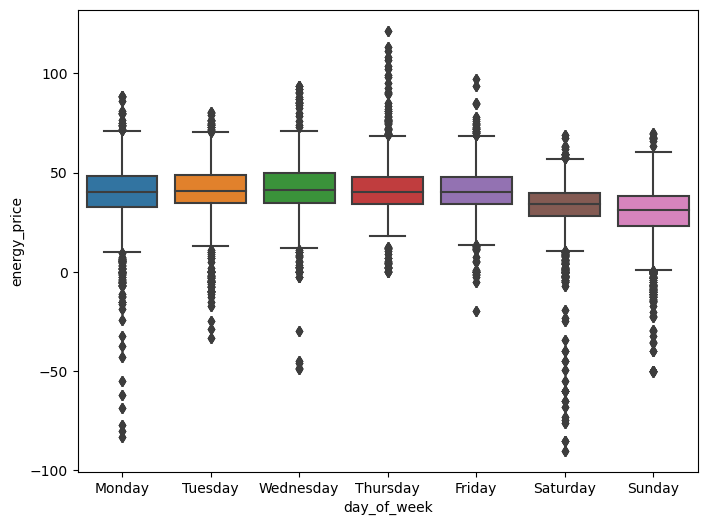

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x=df_energy_2019['day_of_week'], 
    order=list_day_of_week, 
    y=df_energy_2019['energy_price'] 
    )

- For all days of week, we have quite some outliers.
- Prices on weekends are lower than on weekdays.

### Analyzation -  Energy feeding volume and day of week

In [9]:
# reshape df_energy_2019
df_energy_2019_reshape = df_energy_2019.melt(['datetime', 'day_of_week', 'energy_price', 'date', 'time'], var_name='type_of_power', value_name='feeding_volume')

df_energy_2019_reshape.head()

,datetime,day_of_week,energy_price,date,time,type_of_power,feeding_volume
0,2019-01-01 00:00:00,Tuesday,10.07,2019-01-01,00:00:00,nuclear_power,8892.407
1,2019-01-01 00:15:00,Tuesday,10.07,2019-01-01,00:15:00,nuclear_power,8681.530
2,2019-01-01 00:30:00,Tuesday,10.07,2019-01-01,00:30:00,nuclear_power,8443.552
3,2019-01-01 00:45:00,Tuesday,10.07,2019-01-01,00:45:00,nuclear_power,8101.865
4,2019-01-01 01:00:00,Tuesday,-4.08,2019-01-01,01:00:00,nuclear_power,8041.866


<AxesSubplot: xlabel='type_of_power', ylabel='feeding_volume'>

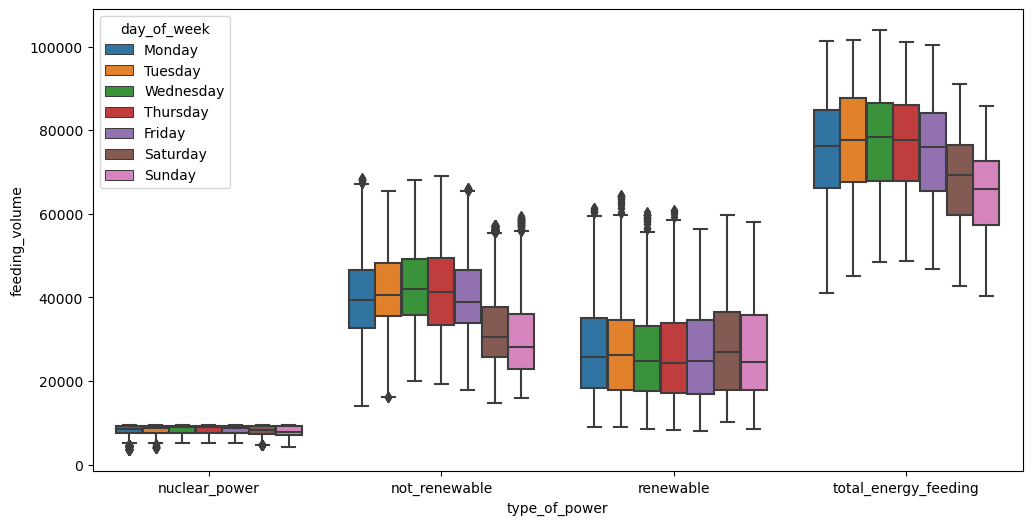

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_energy_2019_reshape,
    x='type_of_power',
    y='feeding_volume',
    hue='day_of_week',
    hue_order=list_day_of_week
)

- No significant differences on feeding volume of nuclear power and renewable energy per day of week
- Feeding volume of not renewable energy is considerably less (by about 10.000 MW)
--> Total feeding volume of renewable energy is the same also on weekends, but the demand is less (refer to the article above), so that the feeding volume of not renewable energy becomes lower, which leads to the lower price.

Ref:
[Bruttostromerzeugung in Deutschland 2019-2022](https://www.destatis.de/DE/Themen/Branchen-Unternehmen/Energie/Erzeugung/Tabellen/bruttostromerzeugung.html)

## Percentage energy feeding volume per power category

In [11]:
df_energy_2019['nuclear_power%'] = df_energy_2019['nuclear_power'] / df_energy_2019['total_energy_feeding']
df_energy_2019['not_renewable%'] = df_energy_2019['not_renewable'] / df_energy_2019['total_energy_feeding']
df_energy_2019['renewable%'] = df_energy_2019['renewable'] / df_energy_2019['total_energy_feeding']

In [12]:
grp_day_of_week = df_energy_2019.groupby('day_of_week')
volume_ratio_per_power = grp_day_of_week.agg({
    'nuclear_power%': np.mean, 
    'not_renewable%': np.mean, 
    'renewable%': np.mean, 
})

volume_ratio_per_power.reindex(index=list_day_of_week)

,nuclear_power%,not_renewable%,renewable%
day_of_week,,,
Monday,0.108389,0.531172,0.360439
Tuesday,0.106679,0.544601,0.348720
Wednesday,0.108133,0.555219,0.336649
Thursday,0.109446,0.552618,0.337937
Friday,0.110860,0.544032,0.345108
Saturday,0.118861,0.476991,0.404148
Sunday,0.122259,0.469636,0.408105


In [13]:
volume_per_power = grp_day_of_week.agg({
    'nuclear_power': np.mean, 
    'not_renewable': np.mean, 
    'renewable': np.mean, 
})
volume_per_power.reindex(index=list_day_of_week)


,nuclear_power,not_renewable,renewable
day_of_week,,,
Monday,8053.890091,39833.859833,27431.358686
Tuesday,8124.121757,41805.154624,27307.107734
Wednesday,8222.424775,42630.782726,26244.883240
Thursday,8255.312744,42105.249819,26188.961456
Friday,8182.182609,40454.298302,26318.379098
Saturday,8018.428055,32213.260101,28079.060008
Sunday,7872.724631,30310.559542,26866.948598
